In [3]:
import importlib

In [60]:
import scheduler3

importlib.reload(scheduler3)

from scheduler3 import HospitalistSchedulerLP, DEFAULT_DOCTORS, DEFAULT_DEMAND

In [ ]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 0.95, 'SH': 1.0, 'MWC': 0.89}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=100.0,
    pen_over=1.0,
    lambda_used=0.0,
    start_dow=0
)

In [7]:
sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")

# Optional: inspect daily schedule
# schedule = sched.schedule_table()
# by_h, req = sched.daily_coverage()

Status: Optimal
Per-hospital metrics:
  MOKC: %days fully covered=71.43%, avg % covered=97.06%
  MWC: %days fully covered=100.00%, avg % covered=100.00%
  SH: %days fully covered=25.00%, avg % covered=87.50%
System: %days all sites covered=21.43%, avg % covered=98.40%


In [8]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 0.95, 'SH': 1.0, 'MWC': 0.89}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=100000.0,
    pen_over=1.0,
    lambda_used=0.0,
    start_dow=0
)

In [9]:
sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")

Status: Optimal
Per-hospital metrics:
  MOKC: %days fully covered=71.43%, avg % covered=97.06%
  MWC: %days fully covered=100.00%, avg % covered=100.00%
  SH: %days fully covered=25.00%, avg % covered=87.50%
System: %days all sites covered=10.71%, avg % covered=99.55%


In [10]:
sched.schedule_table()

{0: {'MOKC': ['Langer', 'Mani', 'Nazir', "O'Neal", 'Pham', 'Riggs', 'Russell'],
  'MWC': ['Martin'],
  'SH': ['Blair', 'Brazowski']},
 1: {'MOKC': ['Baroi', 'Langer', 'Mani', 'Nazir', 'Pham', 'Riggs', 'Russell'],
  'MWC': ['Martin'],
  'SH': ['Blair', 'Brazowski']},
 2: {'MOKC': ['Baroi',
   'Langmacher',
   'Mani',
   'Nazir',
   'Russell',
   'Smith',
   'Treadwell'],
  'MWC': ['Martin'],
  'SH': ['Blair', 'Brazowski']},
 3: {'MOKC': ['Baroi',
   'Langmacher',
   'Mani',
   'Nazir',
   'Russell',
   'Smith',
   'Treadwell'],
  'MWC': ['Martin'],
  'SH': ['Blair', 'Brazowski']},
 4: {'MOKC': ['Baroi',
   'Langmacher',
   'Mani',
   'Nazir',
   'Patel',
   'Smith',
   'Treadwell'],
  'MWC': ['Martin'],
  'SH': ['Anderson', 'Blair']},
 5: {'MOKC': ['Baroi', 'Fogle', 'Gopala', 'Langmacher', 'Patel', 'Smith'],
  'MWC': ['Miles'],
  'SH': ['Anderson', 'Blair', 'Porter']},
 6: {'MOKC': ['Baroi', 'Fogle', 'Gopala', 'Langmacher', 'Patel', 'Smith'],
  'MWC': ['Miles'],
  'SH': ['Anderson', 'Bl

In [12]:
sched.daily_coverage()

({'MOKC': [136.0,
   136.0,
   136.0,
   136.0,
   136.0,
   116.0,
   116.0,
   136.0,
   136.0,
   136.0,
   136.0,
   136.0,
   126.0,
   126.0,
   136.0,
   136.0,
   136.0,
   136.0,
   136.0,
   116.0,
   116.0,
   136.0,
   136.0,
   136.0,
   136.0,
   136.0,
   126.0,
   126.0],
  'MWC': [24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0,
   24.0],
  'SH': [40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   60.0,
   60.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   40.0,
   60.0,
   60.0,
   40.0,
   60.0,
   60.0,
   60.0,
   40.0,
   40.0,
   40.0]},
 {'MOKC': 134.9, 'MWC': 13.35, 'SH': 48.0})

In [30]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1e7,
    pen_over=1.0,
    lambda_used=0.0,
    start_dow=0
)

In [31]:
sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")

Status: Optimal
Per-hospital metrics:
  MOKC: %days fully covered=35.71%, avg % covered=95.27%
  MWC: %days fully covered=100.00%, avg % covered=100.00%
  SH: %days fully covered=25.00%, avg % covered=87.50%
System: %days all sites covered=17.86%, avg % covered=97.40%


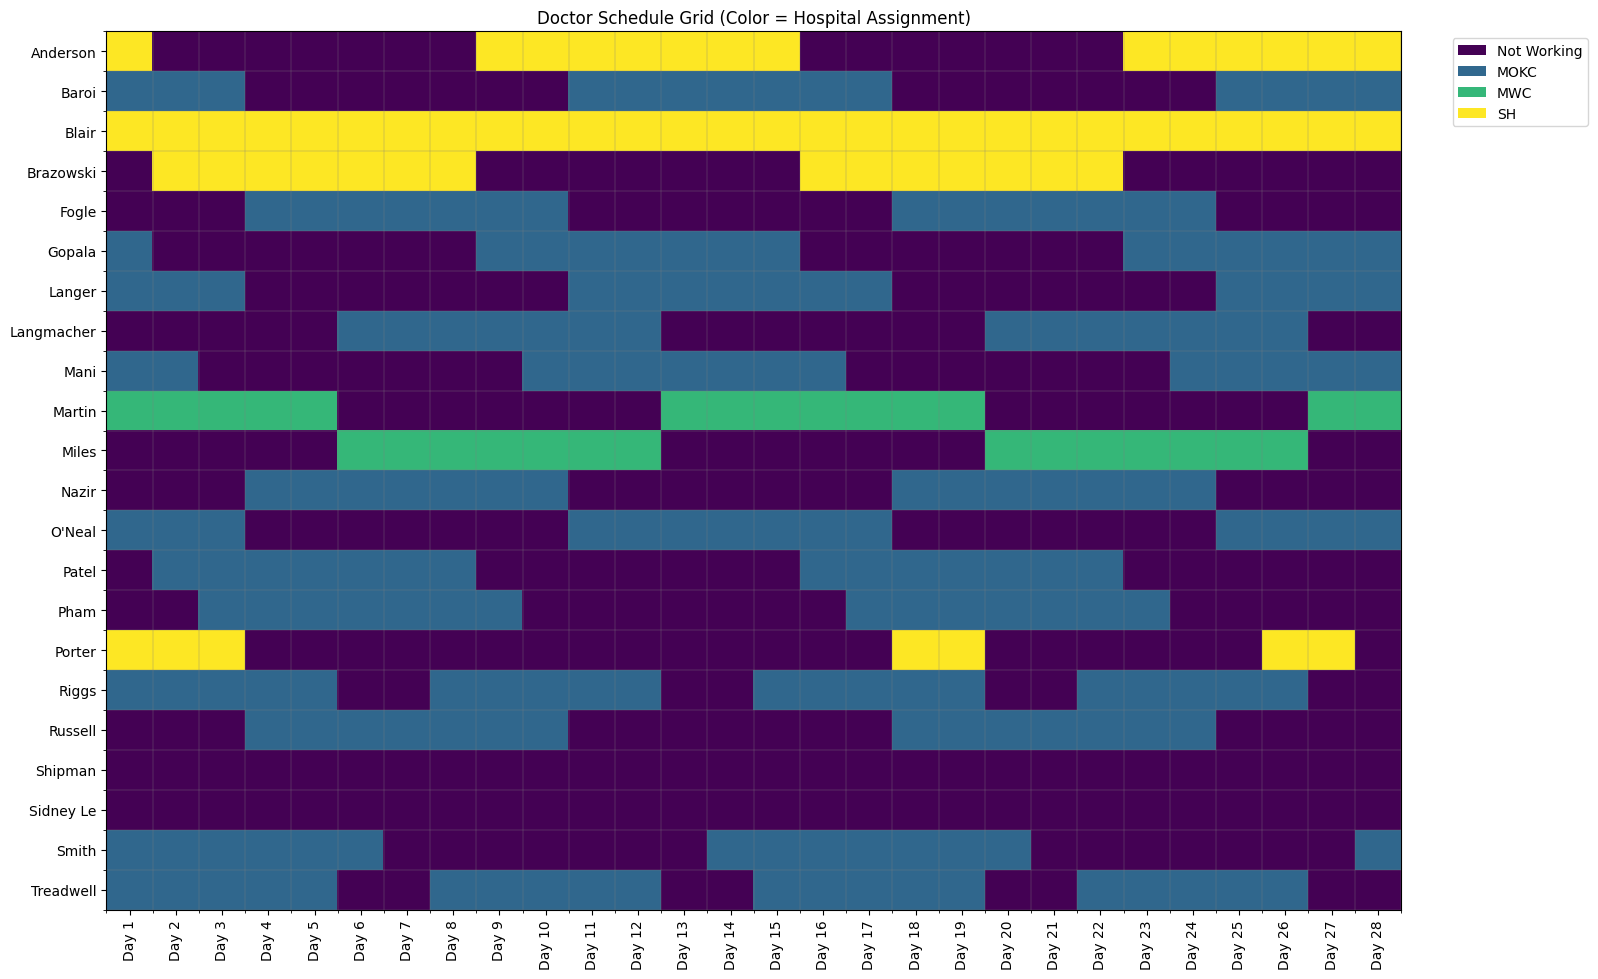

In [32]:
sched.grid()

In [33]:
sched.audit()

no violations found


{}

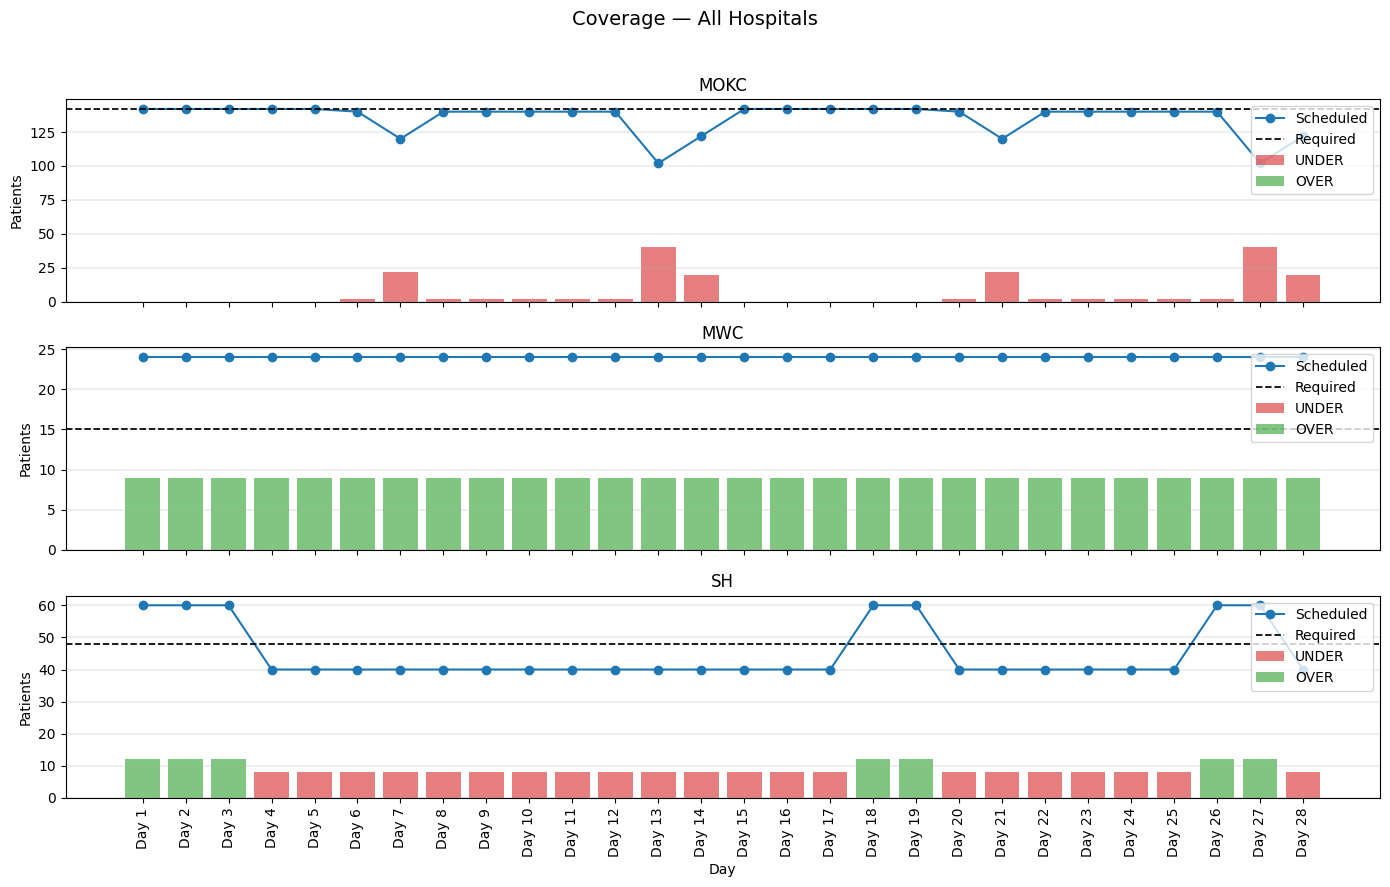

In [34]:
sched.plot_coverage()

In [35]:
DEFAULT_DOCTORS['FT1'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':1,
    'type': 'FT'
}

In [36]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1e7,
    pen_over=1.0,
    lambda_used=0.0,
    start_dow=0
)

In [37]:
sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")

Status: Optimal
Per-hospital metrics:
  MOKC: %days fully covered=35.71%, avg % covered=97.28%
  MWC: %days fully covered=100.00%, avg % covered=100.00%
  SH: %days fully covered=60.71%, avg % covered=93.45%
System: %days all sites covered=32.14%, avg % covered=98.57%


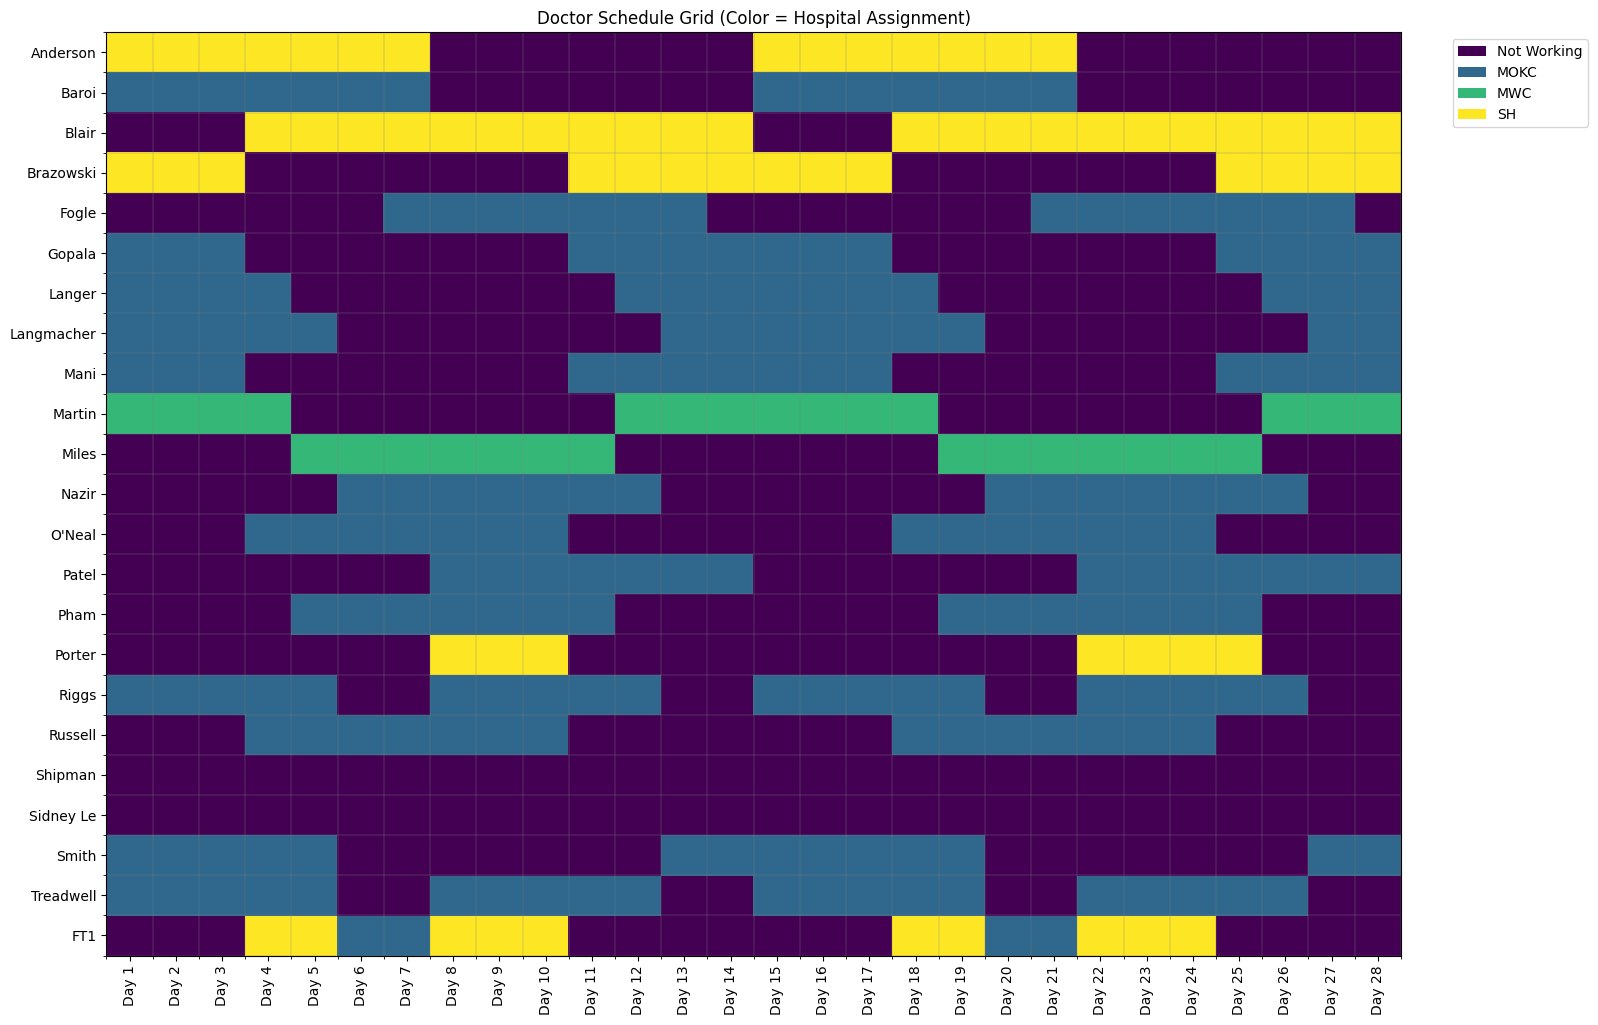

In [38]:
sched.grid()

In [39]:
DEFAULT_DOCTORS['FT2'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':1,
    'type': 'FT'
}

In [40]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1e7,
    pen_over=1.0,
    lambda_used=0.0,
    start_dow=0
)

sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")



KeyboardInterrupt: 

In [17]:
raw_doctors = {
    'Anderson': {'patients': 24, 'MOKC': 0, 'SH': 1, 'MWC': 0, 'type': 'FT'},
    'Baroi':    {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Blair':    {'patients': 16, 'MOKC': 0, 'SH': 1, 'MWC': 1, 'type': 'PT'},
    'Brazowski': {'patients': 24, 'MOKC': 0, 'SH': 1, 'MWC': 0, 'type': 'FT'},
    'Fogle':    {'patients': 10, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Gopala':   {'patients': 24, 'MOKC': 1, 'SH': 0, 'MWC': 1, 'type': 'FT'},
    'Langer':   {'patients': 18, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Langmacher': {'patients': 18, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Mani':     {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Martin':   {'patients': 24, 'MOKC': 0, 'SH': 0, 'MWC': 1, 'type': 'FT'},
    'Miles':    {'patients': 24, 'MOKC': 0, 'SH': 0, 'MWC': 1, 'type': 'FT'},
    'Nazir':    {'patients': 24, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    "O'Neal":   {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Patel':    {'patients': 24, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Pham':     {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Porter':   {'patients': 20, 'MOKC': 0, 'SH': 1, 'MWC': 0, 'type': 'PT7'},
    'Riggs':    {'patients': 10, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'PTWD'},
    'Russell':  {'patients': 24, 'MOKC': 1, 'SH': 1, 'MWC': 1, 'type': 'FT'},
    'Shipman':  {'patients': 24, 'MOKC': 0, 'SH': 0, 'MWC': 1, 'type': 'PTWE'},
    'Sidney Le': {'patients': 24, 'MOKC': 0, 'SH': 0, 'MWC': 1, 'type': 'PT4'},
    'Smith':    {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
    'Treadwell': {'patients': 10, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'PTWD'}
}

In [18]:
h = HospitalScheduler(doctors=raw_doctors, coverage_ratio={
            'MOKC': 1,
            'MWC': 1,
            'SH': 1
        })

h.build_model()
h.solve_model()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/user/.pyenv/versions/jupjup/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gq/6988dl_x2hqc1ldc31zkgfvh0000gn/T/d60b50fb0fc04d74b3064a5b02ff88e7-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/gq/6988dl_x2hqc1ldc31zkgfvh0000gn/T/d60b50fb0fc04d74b3064a5b02ff88e7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2829 COLUMNS
At line 22800 RHS
At line 25625 BOUNDS
At line 27826 ENDATA
Problem MODEL has 2824 rows, 2368 columns and 15402 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2.91971e+10 - 0.03 seconds
Cgl0002I 1156 variables fixed
Cgl0003I 884 fixed, 0 tightened bounds, 21 strengthened rows, 0 substitutions
Cgl0004I processed model has 192 rows, 308 columns (140 integer (120 of which binary)) and 732 elements
Cbc0038I Initial 

In [19]:
h.compute_coverage_metrics()

,% Days Fully Covered,Average % Covered
MOKC,0.00,10.06
MWC,42.86,68.57
SH,0.00,43.75
Overall,14.29,40.79


In [20]:
h.coverage_ratio

{'MOKC': 1, 'MWC': 1, 'SH': 1}

In [21]:
h.audit()

Anderson is on 0 and off 28
Baroi is on 0 and off 28
Brazowski is on 0 and off 28
Fogle is on 0 and off 28
Gopala is on 0 and off 28
Langer is on 0 and off 28
Langmacher is on 0 and off 28
Mani is on 0 and off 28
Martin is on 0 and off 28
Miles is on 0 and off 28
Nazir is on 0 and off 28
O'Neal is on 0 and off 28
Patel is on 0 and off 28
Pham is on 0 and off 28
Russell is on 0 and off 28
Smith is on 0 and off 28


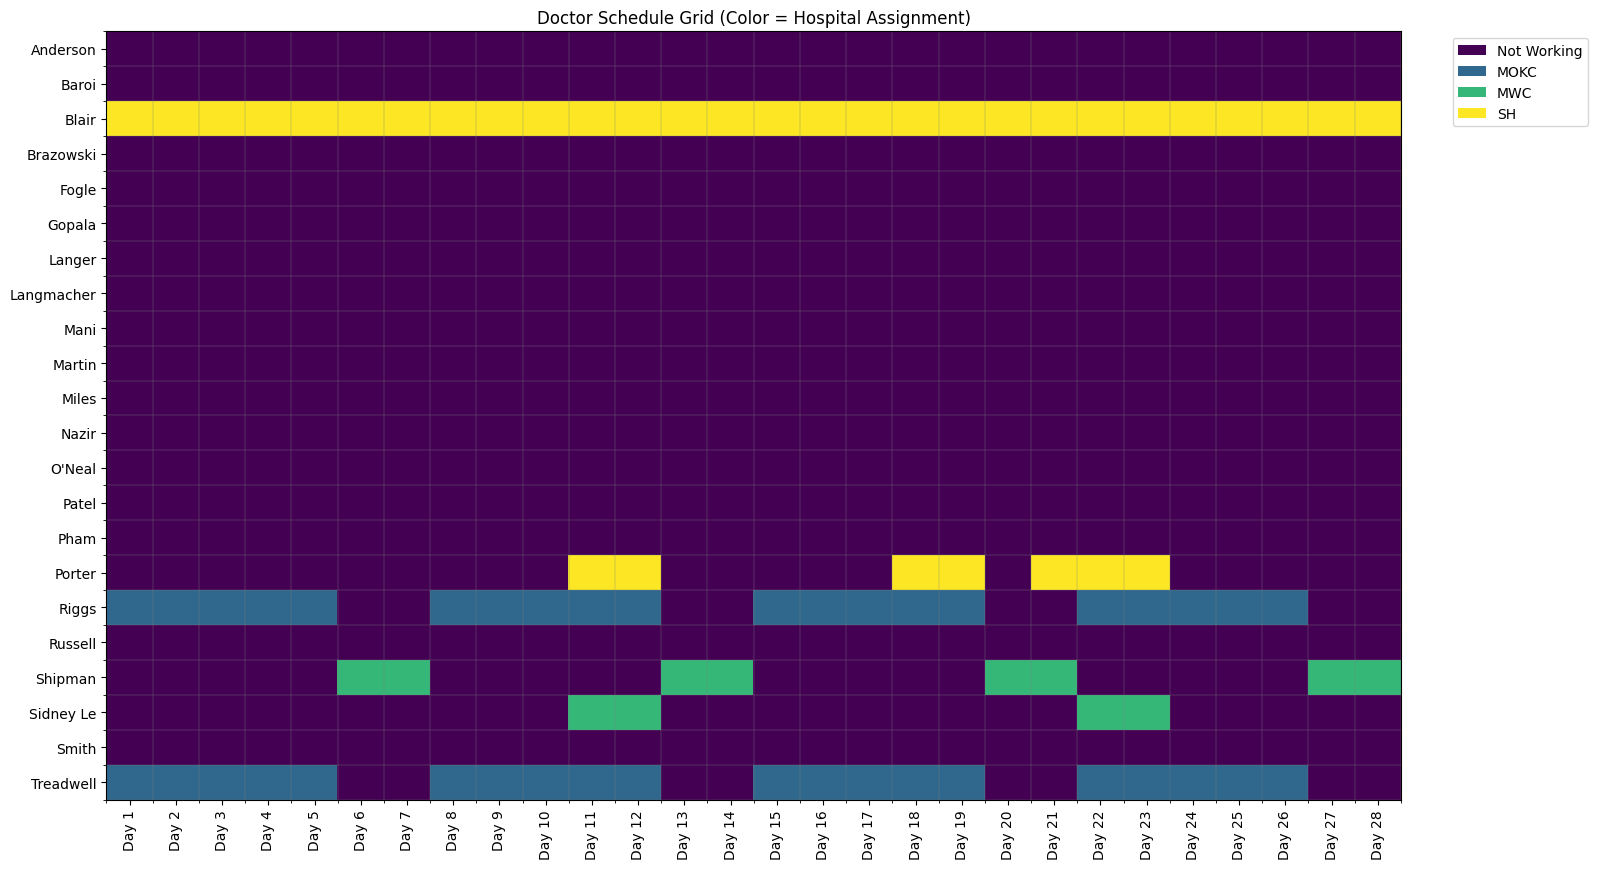

In [8]:
h.grid()

In [54]:
DEFAULT_DOCTORS.pop("FT1")

{'patients': 20, 'MOKC': 1, 'SH': 1, 'MWC': 0, 'type': 'FT'}

In [55]:
DEFAULT_DOCTORS

{'Anderson': {'patients': 24, 'MOKC': 0, 'SH': 1, 'MWC': 0, 'type': 'FT'},
 'Baroi': {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 'Blair': {'patients': 16, 'MOKC': 0, 'SH': 1, 'MWC': 1, 'type': 'PT'},
 'Brazowski': {'patients': 24, 'MOKC': 0, 'SH': 1, 'MWC': 0, 'type': 'FT'},
 'Fogle': {'patients': 10, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 'Gopala': {'patients': 24, 'MOKC': 1, 'SH': 0, 'MWC': 1, 'type': 'FT'},
 'Langer': {'patients': 18, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 'Langmacher': {'patients': 18, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 'Mani': {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 'Martin': {'patients': 24, 'MOKC': 0, 'SH': 0, 'MWC': 1, 'type': 'FT'},
 'Miles': {'patients': 24, 'MOKC': 0, 'SH': 0, 'MWC': 1, 'type': 'FT'},
 'Nazir': {'patients': 24, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 "O'Neal": {'patients': 20, 'MOKC': 1, 'SH': 0, 'MWC': 0, 'type': 'FT'},
 'Patel': {'patients': 24, 'MOKC': 1, 'SH': 0, 'M

In [ ]:
# DEFAULT_DOCTORS['PT1'] = {
#     'patients': 20,
#     'MOKC': 1, 'SH': 1, 'MWC':0,
#     'type': 'PT'
# }

In [61]:
DEFAULT_DOCTORS['FT1'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':0,
    'type': 'FT'
}

In [64]:
DEFAULT_DOCTORS['FT2'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':0,
    'type': 'FT'
}

In [65]:
DEFAULT_DOCTORS.keys()

dict_keys(['Anderson', 'Baroi', 'Blair', 'Brazowski', 'Fogle', 'Gopala', 'Langer', 'Langmacher', 'Mani', 'Martin', 'Miles', 'Nazir', "O'Neal", 'Patel', 'Pham', 'Porter', 'Riggs', 'Russell', 'Shipman', 'Sidney Le', 'Smith', 'Treadwell', 'FT1', 'FT2'])

In [66]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1e7,
    pen_over=1.0,
    lambda_used=0.01,
    start_dow=0
)

sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")



Status: Optimal
Per-hospital metrics:
  MOKC: %days fully covered=53.57%, avg % covered=99.35%
  MWC: %days fully covered=100.00%, avg % covered=100.00%
  SH: %days fully covered=92.86%, avg % covered=98.81%
System: %days all sites covered=53.57%, avg % covered=99.97%


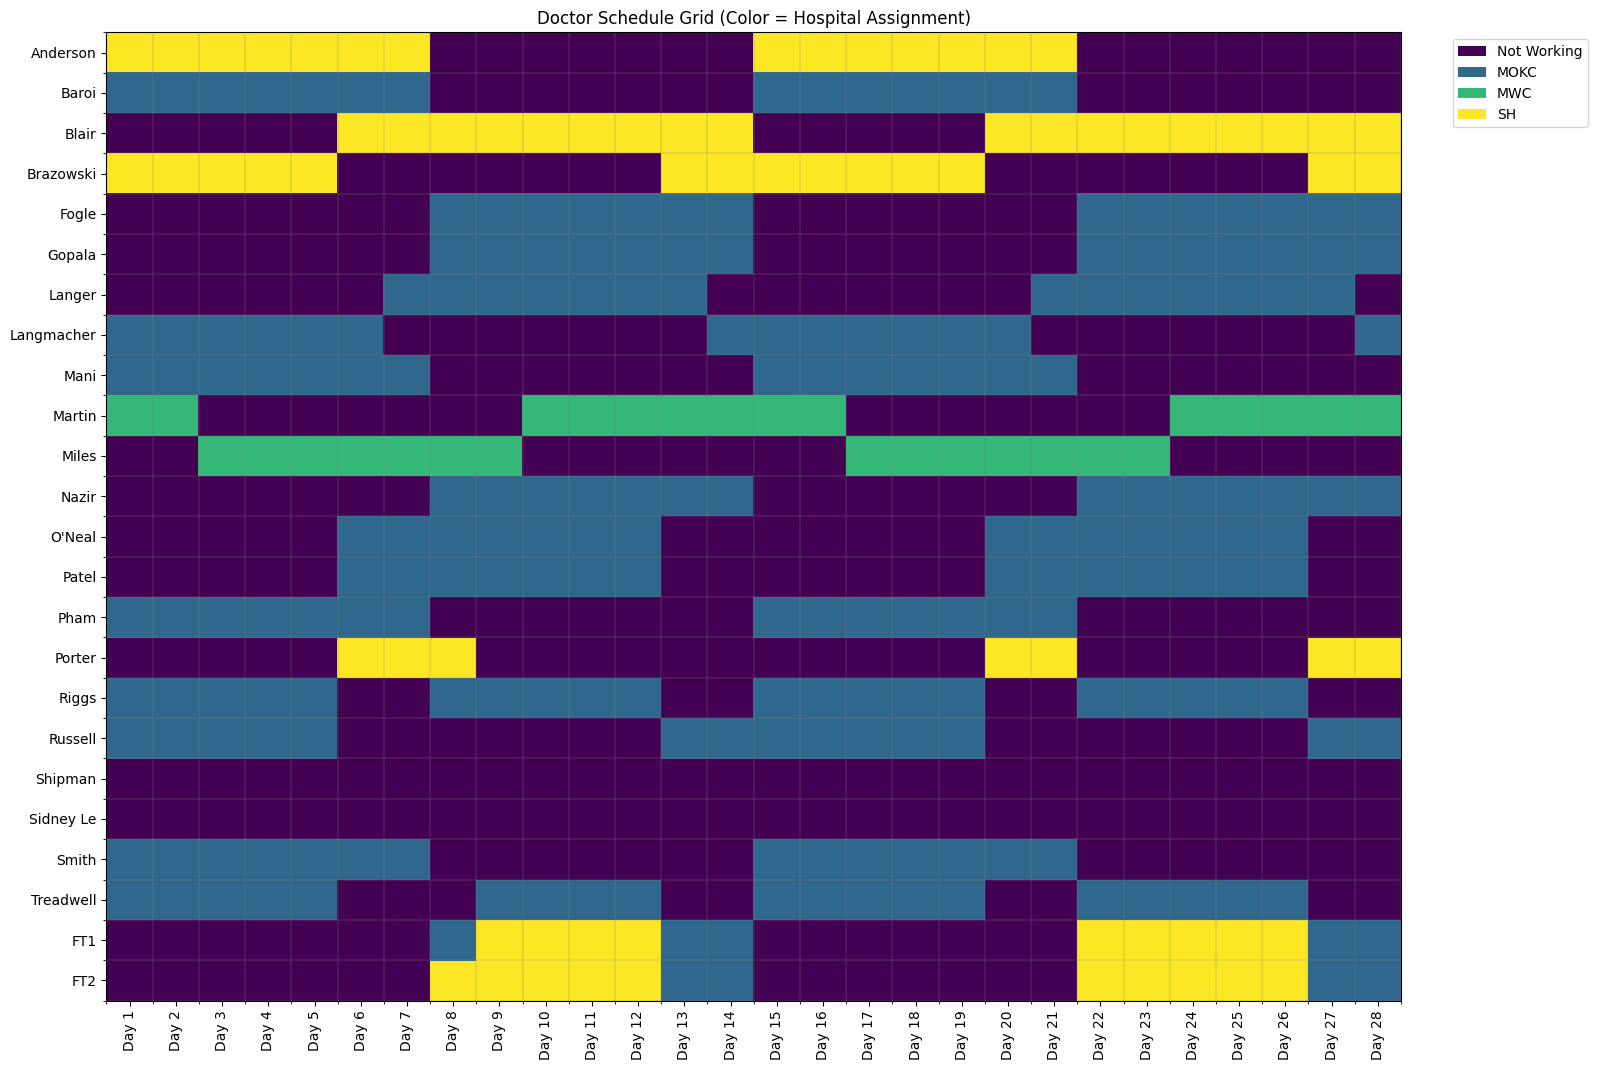

In [67]:
sched.grid()

In [68]:
sched.audit()

no violations found


{}

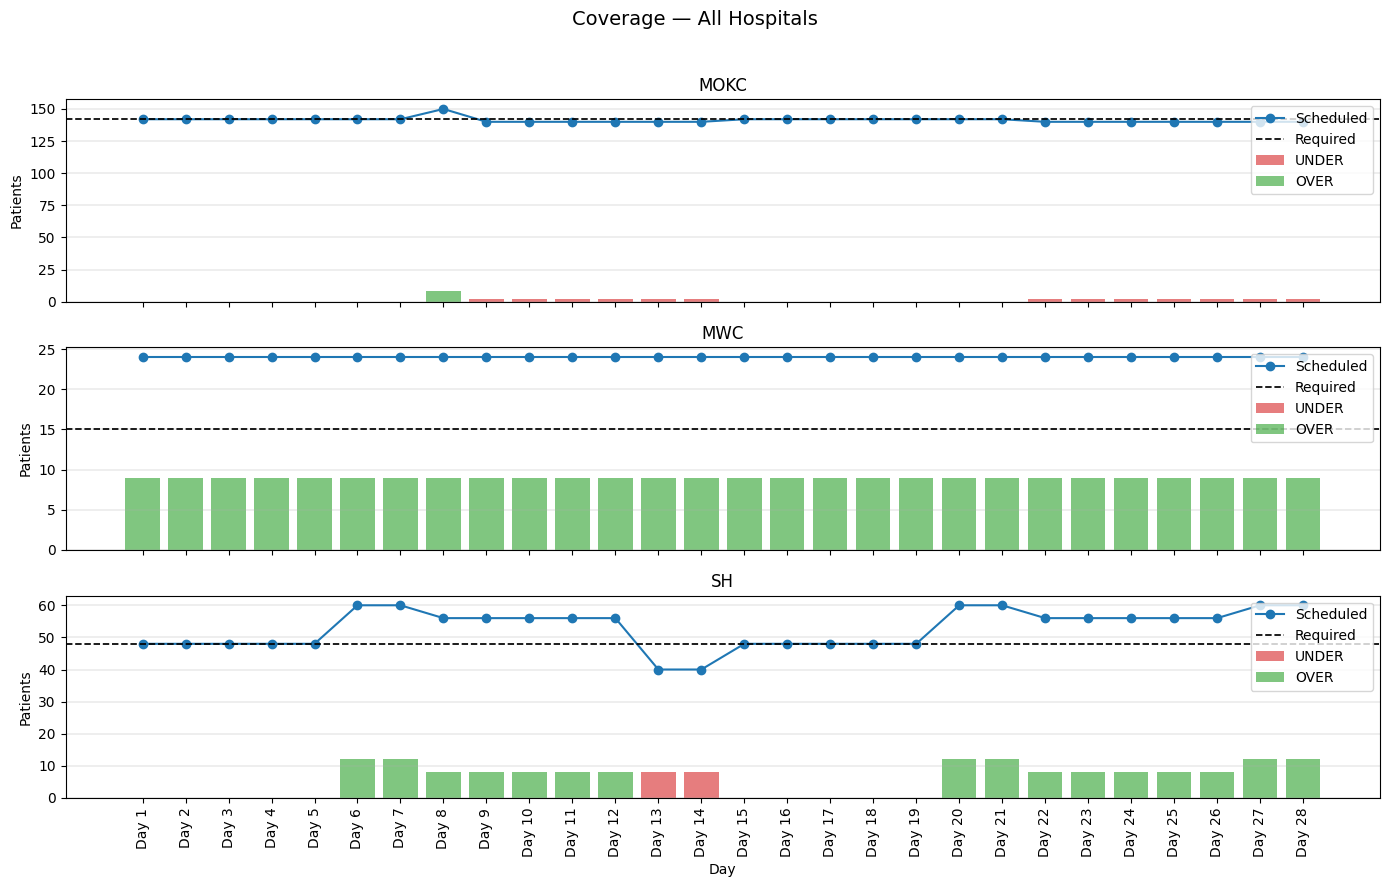

In [69]:
sched.plot_coverage()

In [70]:
DEFAULT_DOCTORS['FT3'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':0,
    'type': 'FT'
}

In [71]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1e7,
    pen_over=1.0,
    lambda_used=0.01,
    start_dow=0
)

sched.build()
status = sched.solve(msg=False)  # set msg=True to see CBC logs
print("Status:", status)

metrics = sched.metrics()
print("Per-hospital metrics:")
for h, m in metrics['per_hospital'].items():
    print(f"  {h}: %days fully covered={m['pct_days_fully_covered']:.2%}, "
            f"avg % covered={m['avg_pct_covered']:.2%}")

sysm = metrics['system']
print(f"System: %days all sites covered={sysm['pct_days_all_sites_covered']:.2%}, "
    f"avg % covered={sysm['avg_pct_covered']:.2%}")



KeyboardInterrupt: 